In [4]:
import numpy as np
import matplotlib.pyplot as plt

datadir = '../data/UJIndoorLoc/'

# anomaly
x2 = np.load(datadir + 'std1.npy').squeeze()
y2 = np.load(datadir + 'mu_loss1.npy').squeeze()
# normal
x1 = np.load(datadir + 'std.npy').squeeze()
y1 = np.load(datadir + 'mu_loss.npy').squeeze()

print(x2.shape, y2.shape, x1.shape, y1.shape)

(9492, 10) (9492, 522) (508, 10) (508, 522)


/home/nana/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

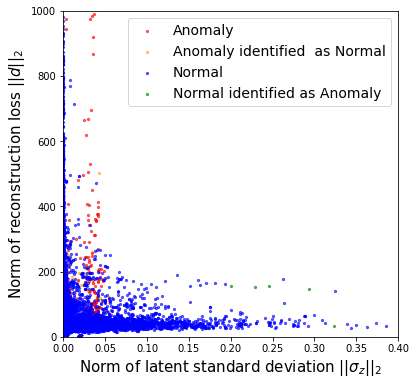

In [17]:
import random
import numpy as np

pred = np.load('../data/UJIndoorLoc/pred.npy')
observe = np.load('../data/UJIndoorLoc/observe.npy')
data = np.load('../data/UJIndoorLoc/data.npy')       

TT = np.where((pred & observe) == 1)[0]
FF = np.where((pred | observe) == 0)[0]
TF = np.where((pred - observe) == -1)[0]
FT = np.where((pred - observe) == 1)[0]

x = np.sum(np.concatenate((x1, x2), axis=0), axis = 1).squeeze()
y = np.sum(np.concatenate((y1, y2), axis=0), axis = 1).squeeze()

x_TT = x[TT]
y_TT = y[TT]
x_FF = x[FF]
y_FF = y[FF]
x_TF = x[TF]
y_TF = y[TF]
x_FT = x[FT]
y_FT = y[FT]

# x_TT = np.sum(data[:,121:], axis = 1).squeeze()[TT]
# y_TT = np.sum(data[:,:121], axis = 1).squeeze()[TT]
# x_FF = np.sum(data[:,121:], axis = 1).squeeze()[FF]
# y_FF = np.sum(data[:,:121], axis = 1).squeeze()[FF]
# x_TF = np.sum(data[:,121:], axis = 1).squeeze()[TF]
# y_TF = np.sum(data[:,:121], axis = 1).squeeze()[TF]
# x_FT = np.sum(data[:,121:], axis = 1).squeeze()[FT]
# y_FT = np.sum(data[:,:121], axis = 1).squeeze()[FT]

import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(6,6))

ax = plt.subplot()

plt.xlim([0.0000001,0.4]) #thyroid 0,0.15 letter 0,0.6 kddcup99 0.0000001,0.25
plt.ylim([0.02,1000])  #thyroid 0,10  letter 0,60  kddcup99 0.02,100000
# plt.yscale('log')
# plt.xscale('log')

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15, # letter,thyroid 12 kddcup99 10
}

plt.xlabel('Norm of latent standard deviation $||\sigma_z||_2$', font2)
plt.ylabel('Norm of reconstruction loss $||d||_2$', font2)



l1 = ax.scatter(x_TF, y_TF, s=5, c='green', alpha=0.6)
l2 = ax.scatter(x_FT, y_FT, s=5, c='orange', alpha=0.6)
l4 = ax.scatter(x_FF, y_FF, s=5, c='red', alpha=0.6)
l3 = ax.scatter(x_TT, y_TT, s=5, c='blue', alpha=0.6)
 

 
plt.legend(handles = [l4, l2, l3, l1], labels = ['Anomaly','Anomaly identified  as Normal','Normal','Normal identified as Anomaly'], loc = 'best', prop = {'size':14})

plt.savefig('../result/UJIndoorLoc.png', dpi=1000)